In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [236]:
missing_values = ["NA", "n/a", "na", "?", "--",'nan']

In [237]:
df = pd.read_excel('./dataset/has_linkedin.xlsx', na_values= missing_values)

In [238]:
df['linkedinJobTitle'].isna().value_counts()

False    673
True     374
Name: linkedinJobTitle, dtype: int64

In [239]:
df['linkedinSchoolDegree'] = df['linkedinSchoolDegree'].astype(str)
df['linkedinSchoolDegree'].fillna('NaN', inplace=True)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   index                            1047 non-null   int64 
 1   linkedinProfileUrl               1047 non-null   object
 2   fullName                         1047 non-null   object
 3   Jurusan                          1047 non-null   object
 4   companyName                      673 non-null    object
 5   linkedinJobTitle                 673 non-null    object
 6   linkedinJobDateRange             668 non-null    object
 7   linkedinJobLocation              586 non-null    object
 8   location                         755 non-null    object
 9   linkedinSkillsLabel              646 non-null    object
 10  previousCompanyName              523 non-null    object
 11  linkedinPreviousJobTitle         502 non-null    object
 12  linkedinPreviousJobDateRange     5

In [241]:
print(df['linkedinJobTitle'].isnull().sum())

374


In [242]:
df

,index,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,...,linkedinPreviousJobLocation,linkedinSchoolName,linkedinSchoolDegree,linkedinSchoolDateRange,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,tingkatPerusahaan
0,1,https://linkedin.com/in/regyta-permata-fujiani...,Regyta Permata Fujiani Hariyanto,S2 Manajemen,Telkom Foundation,Secretary Board Of Units Business Effectivenes...,Jan 2022 - Present,"Bandung, West Java, Indonesia","Bandung, West Java, Indonesia","Microsoft Office, Microsoft Excel, Leadership,...",...,"Bandung, West Java, Indonesia",Telkom University,"Master's degree, Management",2019 - 2022,Telkom University,"Bachelor of Management, Management Business Te...",2015 - 2019,NaN,punya linkedin,multinasional
1,2,https://linkedin.com/in/linalishobrina,"Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM",S2 Manajemen,Institut Teknologi Telkom Purwokerto,College Lecturer,Aug 2022 - Present,NaN,Jakarta Metropolitan Area,"Market Research, Marketing Strategy, Digital M...",...,Indonesia,Telkom University,"Magister Management (M.M), Digital Business St...",Aug 2020 - Jan 2022,Telkom University,"Gelar Sarjana, Administrasi dan Manajemen Bisnis",2018 - 2019,NaN,punya linkedin,lokal
2,3,https://linkedin.com/in/anadurrotulisma,Ana Durrotul Isma,S2 Manajemen,PT. TELKOM AKSES,Student Internship,May 2017 - Jul 2017,"Purwokerto, Jawa Tengah, Indonesia",Indonesia,"Training & Development, Statistical Data Analy...",...,"Purwokerto, Jawa Tengah, Indonesia",Telkom University,"Bachelor Degree, Telecommunication Engineering",Aug 2014 - Nov 2018,NaN,NaN,NaN,NaN,punya linkedin,multinasional
3,4,https://linkedin.com/in/nindyrestip,Nindy Resti Puranda,S2 Manajemen,Tempat Uji Kompetensi FEB Telkom University,Operational and Marketing Manager,Aug 2019 - Present,"Bandung, West Java, Indonesia","Siak, Riau, Indonesia","Event Planning, Banking, Credit Risk Managemen...",...,"Jakarta Selatan, Jakarta, Indonesia",Telkom University,"Master's degree, Marketing/Marketing Managemen...",Jan 2019 - Mar 2022,Telkom University,"Bachelor's degree, Business Administration, Ma...",Aug 2013 - Apr 2017,NaN,punya linkedin,nasional
4,5,https://linkedin.com/in/aseprizal-nurjaman-785...,aseprizal nurjaman,S2 Informatika,PT. ARM Solusi,Web Developer,May 2016 - Present,bandung,"West Java, Indonesia","Flutter, Website Building, IT Hardware Support...",...,NaN,Telkom University,"Master's degree, Cryptography security",2019 - 2021,UNIVERSITAS PENDIDIKAN INDONESIA,"S.Kom, Ilmu Komputer",2012 - 2016,NaN,punya linkedin,nasional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1334,https://linkedin.com/in/widianasalasanurrahmah,Widiana Salasa Nur Rahmah,S1 Ilmu Komunikasi,YESSLES,Private English Tutor,Mar 2023 - Present,Indonesia Â· On-site,"Madiun Regency, East Java, Indonesia","Search Engine Optimization (SEO), Web Content ...",...,Indonesia,Telkom University,"Gelar Sarjana, Ilmu Komunikasi",NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN
1043,1443,https://www.linkedin.com/in/ihsan-hanif-275920...,IHSAN HANIF,S1 Desain Komunikasi Visual,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN
1044,1445,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,...,NaN,NaN,nan,2019-2023,NaN,NaN,NaN,NaN,punya linkedin,NaN
1045,1446,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,...,NaN,NaN,nan,2018-2022,NaN,NaN,NaN,NaN,punya linkedin,NaN


In [243]:
print(df['linkedinJobTitle'].isna().sum())

374


In [244]:
null_strings = ['null']
df['linkedinJobTitle'].replace(null_strings, np.nan, inplace=True)

In [245]:
df['linkedinJobTitle'].isna().value_counts()

False    673
True     374
Name: linkedinJobTitle, dtype: int64

In [246]:
def categorize(row):
    if pd.isna(row['linkedinJobTitle']):
        return 'tidak bekerja'
    elif ('magister' in row['linkedinSchoolDegree'].lower() or
          'master' in row['linkedinSchoolDegree'].lower() or
          "master's" in row['linkedinSchoolDegree'].lower() or
          'mass' in row['linkedinSchoolDegree'].lower() or
          's2' in row['Jurusan'].lower()):
        return 'melanjutkan pendidikan'
    elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in str(row['linkedinJobTitle']).lower() and
          'founder' not in str(row['linkedinJobTitle']).lower() and
          'co-founder' not in str(row['linkedinJobTitle']).lower() and
          ('magister' not in row['linkedinSchoolDegree'].lower() and
           'master' not in row['linkedinSchoolDegree'].lower() and
           "master's" not in row['linkedinSchoolDegree'].lower() and
           'mass' not in row['linkedinSchoolDegree'].lower()) and
          ('s2' not in row['Jurusan'].lower())):
        return 'Bekerja'
    elif (pd.notna(row['linkedinJobTitle']) and 
          ('owner' in str(row['linkedinJobTitle']).lower() or
           'founder' in str(row['linkedinJobTitle']).lower() or
           'co-founder' in str(row['linkedinJobTitle']).lower())):
        return 'wiraswasta'
    else:
        return 'lainnya'

# Tambahkan kolom label kategori
df['status'] = df.apply(categorize, axis=1)

print(df)








      index                                 linkedinProfileUrl  \
0         1  https://linkedin.com/in/regyta-permata-fujiani...   
1         2             https://linkedin.com/in/linalishobrina   
2         3            https://linkedin.com/in/anadurrotulisma   
3         4                https://linkedin.com/in/nindyrestip   
4         5  https://linkedin.com/in/aseprizal-nurjaman-785...   
...     ...                                                ...   
1042   1334     https://linkedin.com/in/widianasalasanurrahmah   
1043   1443  https://www.linkedin.com/in/ihsan-hanif-275920...   
1044   1445          https://www.linkedin.com/in/tiara-azzani/   
1045   1446  https://www.linkedin.com/in/twulan20/?locale=e...   
1046   1447  https://www.linkedin.com/in/farsya-billah-49b9...   

                                              fullName  \
0                     Regyta Permata Fujiani Hariyanto   
1     Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM   
2                                

In [247]:
# def categorize(row):
#     if ('magister' in row['linkedinSchoolDegree'].lower() or
#         'master' in row['linkedinSchoolDegree'].lower() or
#         "master's" in row['linkedinSchoolDegree'].lower() or
#         'mass' in row['linkedinSchoolDegree'].lower() or
#         's2' in row['linkedinSchoolDegree'].lower()):
#         return 'melanjutkan pendidikan'
#     elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in row['linkedinJobTitle'].lower() and
#           ('magister' not in row['linkedinSchoolDegree'].lower() and
#            'master' not in row['linkedinSchoolDegree'].lower() and
#            "master's" not in row['linkedinSchoolDegree'].lower() and
#            'mass' not in row['linkedinSchoolDegree'].lower()) and
#           ('s2' not in row['linkedinSchoolDegree'].lower())):
#         return 'Bekerja'
#     elif (pd.notna(row['linkedinJobTitle']) and ('owner' in row['linkedinJobTitle'].lower() or 
#           'founder' in row['linkedinJobTitle'].lower() or
#           'co-founder' in row['linkedinJobTitle'].lower())):
#         return 'wiraswasta'
#     elif pd.isna(row['linkedinJobTitle']):
#         return 'tidak bekerja'
#     else:
#         return 'lainnya'

# # Tambahkan kolom label kategori
# df['status'] = df.apply(categorize, axis=1)

# print(df)

In [248]:
df

,index,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,...,linkedinSchoolName,linkedinSchoolDegree,linkedinSchoolDateRange,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,tingkatPerusahaan,status
0,1,https://linkedin.com/in/regyta-permata-fujiani...,Regyta Permata Fujiani Hariyanto,S2 Manajemen,Telkom Foundation,Secretary Board Of Units Business Effectivenes...,Jan 2022 - Present,"Bandung, West Java, Indonesia","Bandung, West Java, Indonesia","Microsoft Office, Microsoft Excel, Leadership,...",...,Telkom University,"Master's degree, Management",2019 - 2022,Telkom University,"Bachelor of Management, Management Business Te...",2015 - 2019,NaN,punya linkedin,multinasional,melanjutkan pendidikan
1,2,https://linkedin.com/in/linalishobrina,"Lina Fatimah Lishobrina, S.A.B., M.M., CPR., CDM",S2 Manajemen,Institut Teknologi Telkom Purwokerto,College Lecturer,Aug 2022 - Present,NaN,Jakarta Metropolitan Area,"Market Research, Marketing Strategy, Digital M...",...,Telkom University,"Magister Management (M.M), Digital Business St...",Aug 2020 - Jan 2022,Telkom University,"Gelar Sarjana, Administrasi dan Manajemen Bisnis",2018 - 2019,NaN,punya linkedin,lokal,melanjutkan pendidikan
2,3,https://linkedin.com/in/anadurrotulisma,Ana Durrotul Isma,S2 Manajemen,PT. TELKOM AKSES,Student Internship,May 2017 - Jul 2017,"Purwokerto, Jawa Tengah, Indonesia",Indonesia,"Training & Development, Statistical Data Analy...",...,Telkom University,"Bachelor Degree, Telecommunication Engineering",Aug 2014 - Nov 2018,NaN,NaN,NaN,NaN,punya linkedin,multinasional,melanjutkan pendidikan
3,4,https://linkedin.com/in/nindyrestip,Nindy Resti Puranda,S2 Manajemen,Tempat Uji Kompetensi FEB Telkom University,Operational and Marketing Manager,Aug 2019 - Present,"Bandung, West Java, Indonesia","Siak, Riau, Indonesia","Event Planning, Banking, Credit Risk Managemen...",...,Telkom University,"Master's degree, Marketing/Marketing Managemen...",Jan 2019 - Mar 2022,Telkom University,"Bachelor's degree, Business Administration, Ma...",Aug 2013 - Apr 2017,NaN,punya linkedin,nasional,melanjutkan pendidikan
4,5,https://linkedin.com/in/aseprizal-nurjaman-785...,aseprizal nurjaman,S2 Informatika,PT. ARM Solusi,Web Developer,May 2016 - Present,bandung,"West Java, Indonesia","Flutter, Website Building, IT Hardware Support...",...,Telkom University,"Master's degree, Cryptography security",2019 - 2021,UNIVERSITAS PENDIDIKAN INDONESIA,"S.Kom, Ilmu Komputer",2012 - 2016,NaN,punya linkedin,nasional,melanjutkan pendidikan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1334,https://linkedin.com/in/widianasalasanurrahmah,Widiana Salasa Nur Rahmah,S1 Ilmu Komunikasi,YESSLES,Private English Tutor,Mar 2023 - Present,Indonesia Â· On-site,"Madiun Regency, East Java, Indonesia","Search Engine Optimization (SEO), Web Content ...",...,Telkom University,"Gelar Sarjana, Ilmu Komunikasi",NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN,Bekerja
1043,1443,https://www.linkedin.com/in/ihsan-hanif-275920...,IHSAN HANIF,S1 Desain Komunikasi Visual,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,nan,NaN,NaN,NaN,NaN,NaN,punya linkedin,NaN,tidak bekerja
1044,1445,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,...,NaN,nan,2019-2023,NaN,NaN,NaN,NaN,punya linkedin,NaN,Bekerja
1045,1446,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,...,NaN,nan,2018-2022,NaN,NaN,NaN,NaN,punya linkedin,NaN,Bekerja


In [249]:
# def categorize(row):
#     if pd.isna(row['linkedinJobTitle']):
#         return 'tidak bekerja'
#     elif (pd.notna(row['linkedinJobTitle']) and 'owner' not in row['linkedinJobTitle'].lower() and
#           ('magister' not in row['linkedinSchoolDegree'].lower() and
#            'master' not in row['linkedinSchoolDegree'].lower() and
#            "master's" not in row['linkedinSchoolDegree'].lower() and
#            'mass' not in row['linkedinSchoolDegree'].lower()) and
#           ('s2' not in row['linkedinSchoolDegree'].lower())):
#         return 'Bekerja'
#     elif pd.notna(row['linkedinJobTitle']) and 'owner' in row['linkedinJobTitle'].lower():
#         return 'wiraswasta'
#     elif ('magister' in row['linkedinSchoolDegree'].lower() or
#         'master' in row['linkedinSchoolDegree'].lower() or
#         "master's" in row['linkedinSchoolDegree'].lower() or
#         'mass' in row['linkedinSchoolDegree'].lower() or
#         's2' in row['linkedinSchoolDegree'].lower()):
#         return 'melanjutkan pendidikan'
#     else:
#         return 'lainnya'

# # Tambahkan kolom label kategori
# df['status'] = df.apply(categorize, axis=1)

# print(df)

In [250]:
df['status'].value_counts()

Bekerja                   596
tidak bekerja             374
melanjutkan pendidikan     64
wiraswasta                 13
Name: status, dtype: int64

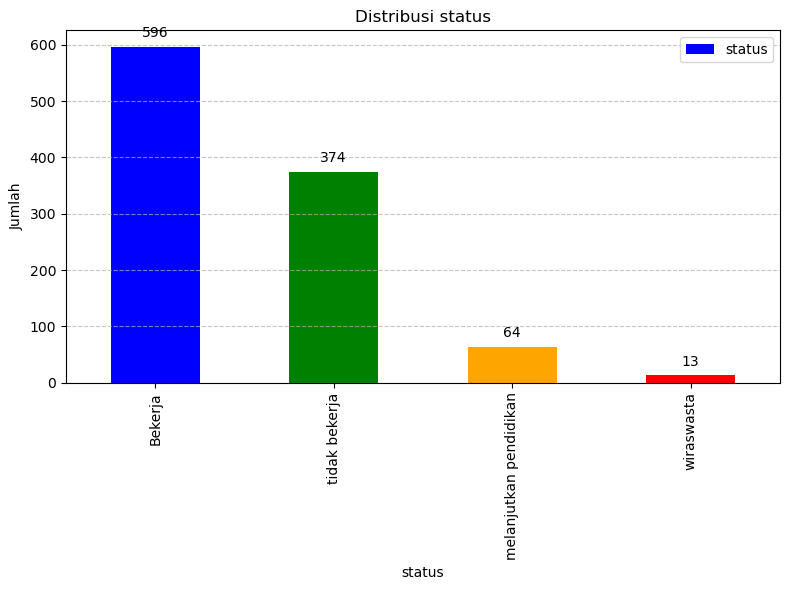

In [263]:
status_counts = df['status'].value_counts()

# Buat plot dan atur ukuran figure
plt.figure(figsize=(8, 6))

ax = status_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])

# Menambahkan label jumlah pada setiap batang bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 15), textcoords='offset points', fontsize=10, color='black')

plt.xlabel('status')
plt.ylabel('Jumlah')
plt.title('Distribusi status')

# Menambahkan legend
plt.legend()

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur warna axis tick labels
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Mengatur label status menjadi vertikal
plt.xticks(rotation=90, ha='center')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [252]:
print(df['linkedinJobTitle'][df['status'] == 'wiraswasta'])

182                        Co-Founder
224                     Founder & CEO
234                           Founder
246                             Owner
263      Business Owner and Marketing
306                    Business Owner
443                           Founder
749                             Owner
841                    Business Owner
854    Co-Founder & Creative Director
903              Small Business Owner
947                    Business Owner
985                             Owner
Name: linkedinJobTitle, dtype: object


In [253]:
print(df['fullName'][df['status'] == 'tidak bekerja'])

11               Aditia Nur Alamsah
20           Keifee Bintang Tamarra
21                  Farhan Nurhildi
23               Fia izzah Maylinda
24         Muhammad Rivaldi Pratama
                   ...             
990                Ricco Adeseptian
991                MICHELLE NATAZYA
1011    fiqshallah suyendra apriano
1012             MUH TAUFIK HIDAYAT
1043                    IHSAN HANIF
Name: fullName, Length: 374, dtype: object
